In [2]:
import logging
import os
import shutil 

import numpy as np
from google.colab import drive

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info('Инициализировали логгер')

ROOT_DIR = '/content/drive' 
drive.mount(ROOT_DIR)
logger.info('Подключили диск')

root_data_dir = os.path.join(ROOT_DIR, 'MyDrive', 'hse_nlp_2021')
if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  logger.info('Содержимое директории %s: %s', root_data_dir, os.listdir(root_data_dir))

Mounted at /content/drive


In [3]:
import os
import pandas as pd

insurance_df = pd.read_csv(os.path.join(root_data_dir, 'insurance.csv'))

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
pd.set_option('display.max_rows', None)
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924000
1,18,male,33.770,1,no,southeast,1725.552300
2,28,male,33.000,3,no,southeast,4449.462000
3,33,male,22.705,0,no,northwest,21984.470610
4,32,male,28.880,0,no,northwest,3866.855200
5,31,female,25.740,0,no,southeast,3756.621600
6,46,female,33.440,1,no,southeast,8240.589600
7,37,female,27.740,3,no,northwest,7281.505600
8,37,male,29.830,2,no,northeast,6406.410700
9,60,female,25.840,0,no,northwest,28923.136920


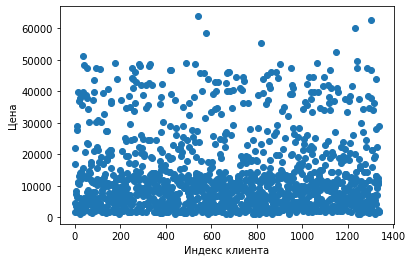

In [5]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

y = insurance_df['charges']

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(len(y)),
    y
)
subplot.set_xlabel('Индекс клиента')
subplot.set_ylabel('Цена')
fig.show()

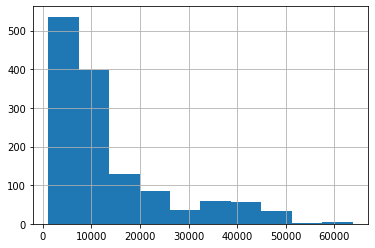

In [6]:
y.hist()

In [7]:
from sklearn.preprocessing import LabelEncoder

for label in ['sex', 'smoker', 'region']:
  insurance_df[label] = LabelEncoder().fit_transform(insurance_df[label])

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [8]:
features1=insurance_df.drop('charges', 1)
labels1=insurance_df['charges'] 
features=features1.head(1070)
labels=labels1.head(1070)

<ipython-input-8-7420bb2a18f0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features1=insurance_df.drop('charges', 1)


In [9]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(labels)
charges_transformed1=lab.fit_transform(labels1)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features, y_transformed)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
new_features=features1
preds=model.predict(new_features)

In [12]:
charges_transformed=pd.DataFrame(data=charges_transformed1) 
insurance_df['charges_transformed']=charges_transformed
insurance_df['predicted']=preds
insurance_df

,age,sex,bmi,children,smoker,region,charges,charges_transformed,predicted
0,19,0,27.900,0,1,3,16884.924000,1005,806
1,18,1,33.770,1,0,2,1725.552300,57,48
2,28,1,33.000,3,0,2,4449.462000,306,383
3,33,1,22.705,0,0,1,21984.470610,1097,584
4,32,1,28.880,0,0,1,3866.855200,254,397
5,31,0,25.740,0,0,2,3756.621600,247,324
6,46,0,33.440,1,0,2,8240.589600,586,724
7,37,0,27.740,3,0,1,7281.505600,526,699
8,37,1,29.830,2,0,0,6406.410700,459,1059
9,60,0,25.840,0,0,1,28923.136920,1169,767


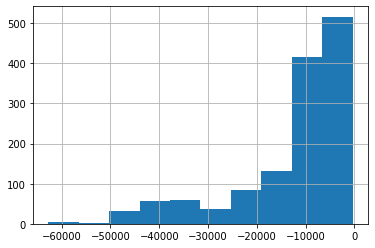

In [13]:
(insurance_df['predicted'] - y).hist()

In [14]:
from sklearn.metrics import mean_absolute_error
y_true=insurance_df['charges_transformed']
y_pred=insurance_df['predicted']
mean_absolute_error(y_true, y_pred)

170.08071748878925

ValueError: ignored

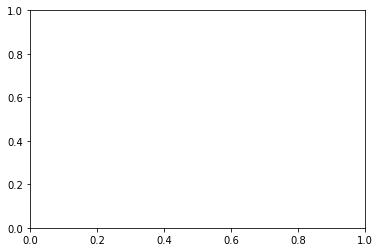

In [15]:
fig, subplot = plt.subplots()
plt.bar(np.arange(len(model.coef_)), model.coef_)
subplot.set_xticks(np.arange(len(model.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features1, labels1, test_size=0.33, random_state=42)

In [17]:
validated_reg=LogisticRegression()
ytrain_transformed = lab.fit_transform(y_train)
validated_reg.fit(X_train, ytrain_transformed)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
x_test_predicted=validated_reg.predict(X_test)
x_test_predicted

array([649, 462, 783, 594, 803, 139, 174, 640, 607, 594, 699, 786, 244,
       425, 883, 880, 542, 855, 635, 866, 266, 307,  12,  81, 821, 607,
       635, 293, 649,  13, 543, 634,  99, 427,  53, 462, 173, 405, 783,
       843, 225, 215, 635, 639, 214, 507, 202, 269, 846, 215, 635, 157,
       366,  87, 635, 656, 391, 861, 635, 607, 536, 240, 412, 660, 607,
       447, 710, 410, 447,  14, 366, 874, 600, 372, 457, 299, 704, 782,
       285, 549,  17, 639, 352, 850,  96, 860, 310, 640, 472, 448, 605,
       772, 884, 455, 843, 307, 845,  99, 664, 874, 447,  46, 260, 412,
       639, 832, 448, 772, 138, 778,  14, 157, 791, 366, 791, 157, 625,
       688, 535, 527, 366, 416, 874, 837, 367, 455, 542, 640, 635,   5,
       299, 310, 285, 462, 299, 635, 164, 883, 887, 858, 516, 720, 109,
       504, 101, 761, 319,  43, 472, 264, 874, 174,   6, 841, 366, 164,
       625, 635, 816, 854, 649, 240, 511, 164, 148, 425, 635, 868, 885,
       602, 437, 542, 138, 416, 602, 891, 663, 596, 748, 632, 78

In [29]:
y_test_predicted=validated_reg.predict(y_test)
y_test_predicted

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_true, y_pred)
mse

57919.064275037366

In [33]:
np.round(mse, decimals=1)

57919.1